### 사진 안면 검출

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [2]:
def plt_imshow(title='image', img=None, figsize=(8, 5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
        
            for i in range(len(img)):
                titles.append(title)
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
            
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

Found 1 faces.


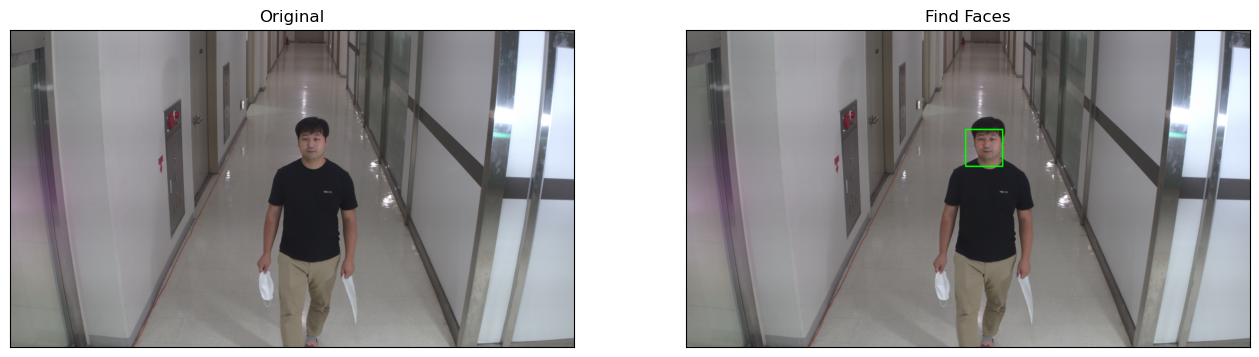

In [15]:
image_path = './testdata/1 (2).jpg'
image = cv2.imread(image_path)

# import imutils
# image = imutils.resize(image, width=500)

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_image = image.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            face_image = mp_drawing.draw_detection(annotated_image, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
            
        plt_imshow(["Original", "Find Faces"], [image, annotated_image], figsize=(16,10))

In [29]:
import os

image_path = './testdata/1 (2).jpg'
output_dir = './facedata'  # 저장할 디렉토리 경로

# 디렉토리가 존재하지 않으면 생성
os.makedirs(output_dir, exist_ok=True)

image = cv2.imread(image_path)

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    for i, detection in enumerate(results.detections):
        face_image = mp_drawing.draw_detection(image, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))

        # 얼굴 부분만 잘라내기
        relative_bounding_box = detection.location_data.relative_bounding_box
        ymin = int(relative_bounding_box.ymin * image.shape[0])
        xmin = int(relative_bounding_box.xmin * image.shape[1])
        ymax = int((relative_bounding_box.ymin + relative_bounding_box.height) * image.shape[0])
        xmax = int((relative_bounding_box.xmin + relative_bounding_box.width) * image.shape[1])
        face_crop = image[ymin:ymax, xmin:xmax]

        # 얼굴 이미지를 파일로 저장
        output_path = os.path.join(output_dir, f'face_{i}.jpg')
        cv2.imwrite(output_path, face_crop)

print(f"Annotated faces saved to {output_dir}")



Annotated faces saved to ./facedata


In [30]:
import os

image_path = './testdata/1 (2).jpg'
output_dir = './facedata'  # 저장할 디렉토리 경로

# 디렉토리가 존재하지 않으면 생성
os.makedirs(output_dir, exist_ok=True)

image = cv2.imread(image_path)

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    for i, detection in enumerate(results.detections):
        # 얼굴 부분만 잘라내기
        relative_bounding_box = detection.location_data.relative_bounding_box
        ymin = int(relative_bounding_box.ymin * image.shape[0])
        xmin = int(relative_bounding_box.xmin * image.shape[1])
        ymax = int((relative_bounding_box.ymin + relative_bounding_box.height) * image.shape[0])
        xmax = int((relative_bounding_box.xmin + relative_bounding_box.width) * image.shape[1])
        face_crop = image[ymin:ymax, xmin:xmax]

        # 얼굴 이미지를 파일로 저장
        output_path = os.path.join(output_dir, f'face_{i}.jpg')
        cv2.imwrite(output_path, face_crop)

print(f"Annotated faces saved to {output_dir}")


Annotated faces saved to ./facedata


### Face_Mesh 찍어보기

In [6]:
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [7]:
drawing_spec = mp_drawing.DrawingSpec(thickness=10, circle_radius=1)

In [8]:
static_image_mode = True
max_num_faces = 10
refine_landmarks = True
min_detection_confidence = 0.5

In [9]:
image_path = './testdata/1008002_REI1_1_0_00_0_01_1_0_20211008_100635_c161_6728_0_004.jpg'
image = cv2.imread(image_path)

In [10]:
with mp_face_mesh.FaceMesh(static_image_mode=static_image_mode, 
                           max_num_faces=max_num_faces, 
                           refine_landmarks=refine_landmarks, 
                           min_detection_confidence=min_detection_confidence) as face_mesh:
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.multi_face_landmarks:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.multi_face_landmarks)))
        
        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
            # print('face_landmarks:', face_landmarks)
            mp_drawing.draw_landmarks(image=annotated_image, 
                                      landmark_list=face_landmarks, 
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=drawing_spec, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=drawing_spec,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_IRISES,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
            
        plt_imshow(["Original", "Find Faces"], [image, annotated_image], figsize=(16,10))


Face not found in image


### mp4 -> avi 형식 변환

In [3]:
import cv2

# mp4 파일 경로
input_file = 'd:/video/exit.mp4'
# 변환된 avi 파일 경로
output_file = 'd:/video/exit.avi'

# 원본 mp4 파일을 읽기 위한 비디오 캡처 객체 생성
cap = cv2.VideoCapture(input_file)

# 원본 mp4 파일의 속성 정보 가져오기
fps = cap.get(cv2.CAP_PROP_FPS)  # 프레임 속도
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 프레임 너비
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 프레임 높이

# avi 형식으로 변환하기 위한 비디오 라이터 객체 생성
fourcc = cv2.VideoWriter_fourcc(*'MJPG')  # 코덱 설정 (여기서는 MJPG 코덱 사용)
out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

# mp4 파일의 각 프레임을 읽어서 avi 파일에 쓰기
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # avi 파일에 프레임 쓰기
    out.write(frame)

# 사용한 객체 해제
cap.release()
out.release()

print('mp4 파일을 avi 형식으로 변환 완료.')

mp4 파일을 avi 형식으로 변환 완료.


### 동영상 안면 검출

In [1]:
import mediapipe as mp
import cv2

# 얼굴 인식 모델 초기화
face_detection = mp.solutions.face_detection.FaceDetection(min_detection_confidence=1)

# 그리기 유틸리티 초기화
drawing_utils = mp.solutions.drawing_utils

# 비디오 캡처 객체 생성
cap = cv2.VideoCapture('d:/video/sample.avi')

# # 축소된 프레임의 너비와 높이
# new_width = 860
# new_height = 540

while True:
    # 프레임 단위로 비디오를 캡처
    ret, frame = cap.read()
    if not ret:
        print("No frame captured")
        break

    # 이미지 축소
    # frame = cv2.resize(frame, (new_width, new_height))
    
    # 프레임을 RGB로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 얼굴 인식 실행
    results = face_detection.process(rgb_frame)

    # 얼굴 인식 결과 그리기
    if results.detections:
        for detection in results.detections:
            # 경계 상자 그리기
            drawing_utils.draw_detection(frame, detection)

    # 프레임을 표시
    cv2.imshow('MediaPipe Face Detection', frame)

    # `q`를 누르면 종료
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

# 비디오 캡처 객체 해제
cap.release()

# 창 닫기
cv2.destroyAllWindows()



No frame captured
